# Programa de Pós-Graduação em Engenharia de Teleinformática
# Otimização Não-linear de Sistemas
# Prof. Tarcisio Ferreira Maciel, Dr.-Ing. (Professor: [maciel@ufc.br](mailto:maciel@ufc.br))
---
## Identificação do aluno

Nome: Rubem Vasconcelos Pacelli

Matrícula: 519024

---

A correlação espacial $ \rho_{i,j} $ entre os canais $ \mathbf{h}_i = \begin{bmatrix} h_{i,1} & h_{i,2} & \ldots & h_{i,N} \end{bmatrix}$ e $ \mathbf{h}_j = \begin{bmatrix} h_{j,1} & h_{j,2} & \ldots & h_{j,N} \end{bmatrix}$, com $\mathbf{h}_i, \mathbf{h}_j \in \mathbb{C}^N $ do enlace direto de uma estação rádio base com $ N $ antenas para os terminais móveis $ i, j $ é dada por $ \rho_{i,j} = \dfrac{ \vert \mathbf{h}_i \mathbf{h}^H_j \vert}{ \Vert \mathbf{h}_i \Vert_2 \Vert \mathbf{h}_j \Vert_2 } $. Sabendo que existem $ K $ terminais móveis, selecione $ G \leq N $ terminais móveis tal que a soma das correlações entre eles dois-a-dois seja mínima, ou seja, selecione os $ G $ terminais móveis com os canais menos correlacionados. Esse problema pode ser formulado como segue: %
$$
\begin{align}
    \mathbf{x}^\star = \underset{ \mathbf{x} }{ \text{minimize} } \quad & \frac{1}{2}\mathbf{x}^T \mathbf{R} \mathbf{x}, \\
    \text{sujeito a} \quad & \boldsymbol{1}^T\mathbf{x} = G, \\
    & \mathbf{x} \in \mathbb{B}^K,
\end{align}
$$
onde $ \mathbf{R} = {[\rho_{i,j}]}_{i,j}, \quad i, j \in  \{1, 2, \ldots, K\} $. Este problema é um **problema de otimização binário quadrático**: função custo quadrática com variáveis de otimização binárias.

O problema acima pode ser simplificado se as variáveis em $\mathbf{x}$ forem relaxadas gerando $ \tilde{\mathbf{x}} \in \mathbb{R}^N $ e $\boldsymbol{0} \leq \tilde{\mathbf{x}} \leq \boldsymbol{1} $. Mesmo assim, o problema acima pode ainda será NP-difícil se a matriz $ \mathbf{R} \not\succcurlyeq \boldsymbol{0} $, i.e., se a matriz $ \mathbf{R} $ não for positiva semidefinida.

De acordo com a construção acima, sabe-se que $ \mathbf{R} $ não é necessariamente positiva semidefinida. Isso pode ser demonstrado gerando-se várias instâncias dessa matriz a partir de canais para $K$ usuários e mostrando a distribuição de seus autovalores. Será possível observar que para algumas instâncias, haverá a ocorrência de autovalores negativos.

In [1]:
# Importa a biblioteca numpy
import numpy as np

# Configura o número de casas decimais impressas para arrarys numpy
np.set_printoptions(precision=3)

# Número de usuários
K = 16
# Número de antenas na ERB
N = 8
# Numero de usuários no grupo
G = 5
# Gera os canais Rayleigh 1 x N descorrelacionados para os K usuários criando-se a matriz H com todos os canais destes usuários empilhados, um por linha
H = np.random.randn(K, N)*np.sqrt(0.5) + 1j*np.random.randn(K, N)*np.sqrt(0.5)

# Gera um simples exemplo de que a matriz R não é positiva semidefinida
R = np.abs(H @ np.transpose(np.conjugate(H)))
D = np.linalg.inv(np.diag(np.sqrt(np.diag(R))))
R = D @ R @ D
print('Mínimo autovalor de R:', np.min(np.linalg.eigvals(R)))


with open('fileH.npy', 'wb') as file:
    np.save(file, R)
with open('fileR.npy', 'wb') as file:
    np.save(file, R)

Mínimo autovalor de R: -0.16119143027117816


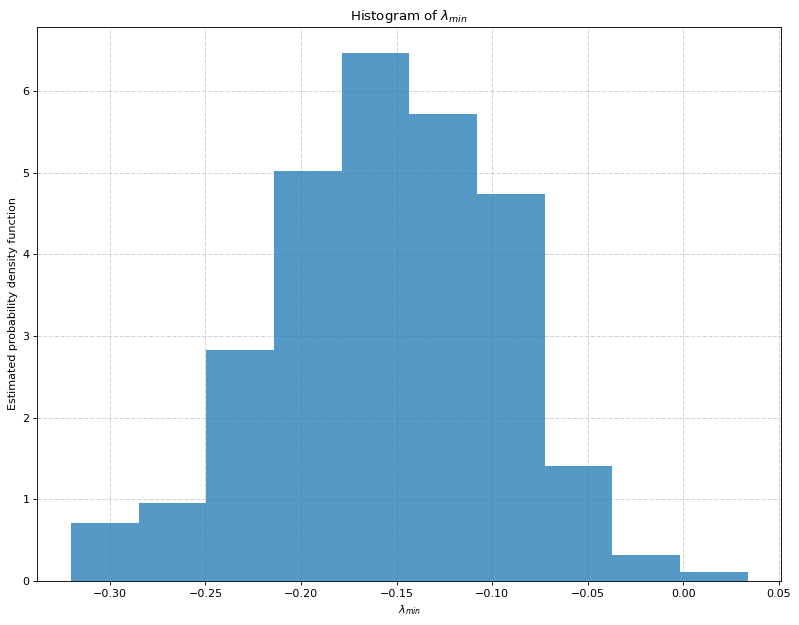

In [4]:
# Importa a biblioteca numpy
from matplotlib import pyplot as plt
import numpy as np

# Configura o número de casas decimais impressas para arrarys numpy
np.set_printoptions(precision=3)

# Número de usuários
K = 16
# Número de antenas na ERB
N = 8
# Numero de usuários no grupo
G = 5

# number of realizations
M = 800
all_lambdas = np.zeros(M)

for m in range(M):
    # Gera os canais Rayleigh 1 x N descorrelacionados para os K usuários criando-se a matriz H com todos os canais destes usuários empilhados, um por linha
    H = np.random.randn(K, N)*np.sqrt(0.5) + 1j*np.random.randn(K, N)*np.sqrt(0.5)
    # Gera um simples exemplo de que a matriz R não é positiva semidefinida
    R = np.abs(H @ np.transpose(np.conjugate(H)))
    D = np.linalg.inv(np.diag(np.sqrt(np.diag(R))))
    R = D @ R @ D
    all_lambdas[m] = np.min(np.linalg.eigvals(R))
    

# plotting the estimated PDF of \lambda_{min}
fig = plt.figure(figsize=(12, 9), dpi=80)
ax = fig.gca()
ax.set_axisbelow(True)
ax.hist(all_lambdas, bins=10, density=True, alpha=0.75)
plt.xlabel(r'$\lambda_{min}$')
plt.ylabel('Estimated probability density function')
plt.title('Histogram of '+r"$\lambda_{min}$")
plt.grid(True, linestyle='-.', linewidth=.5)
plt.show()

Com base no código acima, **gere e plote a distribuição do menor autovalor $\lambda_{min}$ da matriz $\mathbf{R}$ para o cenário configurado acima.**

Uma forma de convexificar o problema apresentado é regularizar a matriz $\mathbf{R}$ gerando uma matriz $\tilde{\mathbf{R}}$ positiva semidefinida. Naturalmente, o problema assim gerado é apenas uma aproximação para o problema original, ou seja, teríamos
$$
\begin{align}
    \tilde{\mathbf{x}}^\star = \underset{ \tilde{\mathbf{x}} }{ \text{minimize} } \quad & \frac{1}{2}\tilde{\mathbf{x}}^T \tilde{\mathbf{R}} \tilde{\mathbf{x}}, \\
    \text{sujeito a} \quad & \boldsymbol{1}^T\tilde{\mathbf{x}} = G, \\
    & \boldsymbol{0} \leq \tilde{\mathbf{x}} \leq \boldsymbol{1}.
\end{align}
$$

Considerando o problema relaxado e convexificado acima, podemos obter uma solução aproximada para o problema original arrendondando para 1 as $G$ maiores componentes de $\tilde{\mathbf{x}}$.

Com base nisso, **convexifique o problema original utilizando uma regularização adequada para $\mathbf{R}$ e solucione o problema original através do problema aproximado.**

In [41]:
using LinearAlgebra
import NPZ

# convexification
𝐑 = NPZ.npzread("fileR.npy")

δ = 0
while minimum(eigvals(𝐑)) < 0
    𝐑 = 𝐑 + δ*I # Tikhonov regularization
    δ += 0.01
end
𝐑 = trunc.(𝐑, digits=5); # truncate the final result to avoid computational problems

In [12]:
using Convex, SCS

K = 16 # number of mobile terminals
N = 8 # number of antenas in the base radio station
G = 5 # group size

𝐱 = Variable(size(𝐑, 1))
f0 = quadform(𝐱, 𝐑)  # objective function (quadratic form)
constraints = [
    sum(𝐱) == G,
    -𝐱 ≤ 0,
    𝐱 ≤ 1
]
problem = minimize(f0, constraints)
solve!(problem, SCS.Optimizer; silent_solver = true)
condition = partialsort(vec(𝐱.value), G, rev=true) # return the Gth maximum value of 𝐱
positions = findall(vec(𝐱.value) .≥ condition)

println("The best group the channels that minimize the least correlation is $(positions)")

The best group the channels that minimize the least correlation is [1, 3, 6, 12, 16]


**Compare a capacidade de canal do grupo de $G$ usuários assim selecionado contra a capacidade de canal do grupo de $G$ de usuários ótimo**. Em ambos os casos, considere a aplicação de **formatação de feixes com forçagem a zero (ZF).** O grupo ótimo pode ser determinado por busca exaustiva entre todas as combinações de $K$ usuários $G$-a-$G$.

**Varia o tamanho $G$ do grupo de 1 a N e avalie a capacidade ótima (busca exaustiva) e a capacidade subótima (convexificação do problema).**

**Para todas as análises, utilize simulações de Monte-Carlo com no mínimo 1000 realizações.**

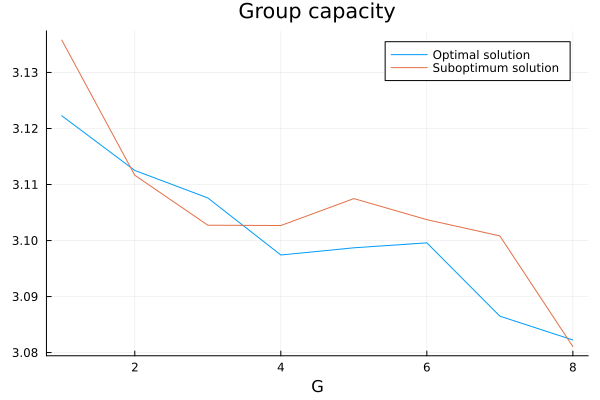

In [53]:
using Combinatorics
using Plots
import NPZ

# Número de usuários
K = 16
# Número de antenas na ERB
N = 8

C_opt = zeros(N) # channel capacity (optimum)
C_subopt = zeros(N) # channel capacity (suboptimum)
for _ ∈ 1:1e3 # Monte-Carlo simulation
    # Generate data
    𝐇 = √0.5randn(K, N) + im*√0.5randn(K, N)
    𝐑 = abs.(𝐇 * 𝐇')
    𝐃 = inv(diagm(sqrt.(diag(𝐑))))
    𝐑 = 𝐃 * 𝐑 * 𝐃
    
    # Tikhonov regularization
    δ = 0
    while minimum(eigvals(𝐑)) < 0
        𝐑 = 𝐑 + δ*I
        δ += 0.01
    end
    𝐑 = trunc.(𝐑, digits=5) # truncate the final result to avoid computational problems
    
    for (i, G) ∈ enumerate(1:N)
        𝐱_subopt = zeros(K) # 𝐱⋆ of suboptimum solution
        𝐱_opt = zeros(K) # 𝐱⋆ of optimum solution
        sol_opt = Inf

        𝐱 = Variable(size(𝐑, 1))
        f0 = quadform(𝐱, 𝐑)  # objective function
        constraints = [
            sum(𝐱) == G,
            -𝐱 ≤ 0,
            𝐱 ≤ 1
        ]
        problem = minimize(f0, constraints)
        solve!(problem, SCS.Optimizer; silent_solver = true)
        condition = partialsort(vec(𝐱.value), G, rev=true) # return the Gth maximum value of 𝐱
        𝐱_subopt = findall(vec(𝐱.value) .≥ condition)

        # optimal (ad-hoc) solution
        for set ∈ combinations(1:size(𝐑, 1), G) # for all combinations
            x = [a ∈ set for a ∈ 1:size(𝐑, 1)] # vector of bits
            if x'*𝐑*x < sol_opt
                sol_opt = x'*𝐑*x
                𝐱_opt = findall(x .== 1)
            end
        end

        # compute the group capacity (suboptimum)
        𝐆 = 𝐇[𝐱_subopt, :] # group channel matrix -> select the vector channels from 𝐇
        𝐌 = pinv(𝐆)/norm(pinv(𝐆)) # modulation matrix, Eq.(6a) PS1: norm(𝐆) is the Frobenius norm; PS2: √P = 1
        C_subopt[i] += log2(real(det(I + 𝐆*𝐌*(𝐆*𝐌)'))) # group capacity (take the real to eliminate the residual imaginary part)

        # compute the group capacity (optimum)
        𝐆 = 𝐇[𝐱_opt[i], :] # group channel matrix -> select the vector channels from 𝐇
        𝐌 = pinv(𝐆)/norm(pinv(𝐆)) # modulation matrix, Eq.(6a) PS1: norm(𝐆) is the Frobenius norm; PS2: √P = 1
        C_opt[i] += log2(real(det(I + 𝐆*𝐌*(𝐆*𝐌)'))) # group capacity (take the real to eliminate the residual imaginary part)
    end
end

# get the mean
C_opt /= 1e3
C_subopt /= 1e3

plot(C_opt, title="Group capacity", label="Optimal solution", xlabel="G")
plot!(C_subopt, label="Suboptimum solution")

# Referências

[1] A convex quadratic SDMA grouping algorithm based on spatial correlation. In: IEEE International Conference on Communications, 2007, Glasgow. Proc. of the IEEE International Conference on Communications, 2007. v. 1. p. 5342-5346. [https://doi.org/10.1109/ICC.2007.884](https://doi.org/10.1109/ICC.2007.884)